In [1]:

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.externals import joblib
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import cohen_kappa_score,precision_score, recall_score, accuracy_score, classification_report, roc_curve, precision_recall_curve, confusion_matrix, f1_score, average_precision_score



C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


## 1. Prepare Data

In [2]:
X_train_resampled = pd.read_csv("../3. Data Preparation/X_train_resampled.csv", index_col=0)
X_train_resampled.shape

(1848, 30)

In [3]:
y_train_resampled = pd.read_csv("../3. Data Preparation/y_train_resampled.csv", index_col=0)
y_train_resampled.shape

(1848, 1)

In [4]:
X_val = pd.read_csv("../3. Data Preparation/X_val.csv", index_col=0)
X_val.shape

(56962, 30)

In [5]:
y_val = pd.read_csv("../3. Data Preparation/y_val.csv", index_col=0, header=0)
y_val.shape

(56962, 1)

## 2.  Decision Tree Classifier (criterion = gini)

In [6]:

clf_dt = DecisionTreeClassifier(criterion='gini', max_depth=3, splitter='best')


In [7]:
clf_dt.fit(X_train_resampled, y_train_resampled['Class'].values)
dot_data = StringIO()
export_graphviz(clf_dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names=X_train_resampled.columns, class_names=['Not Fraud','Fraud'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  



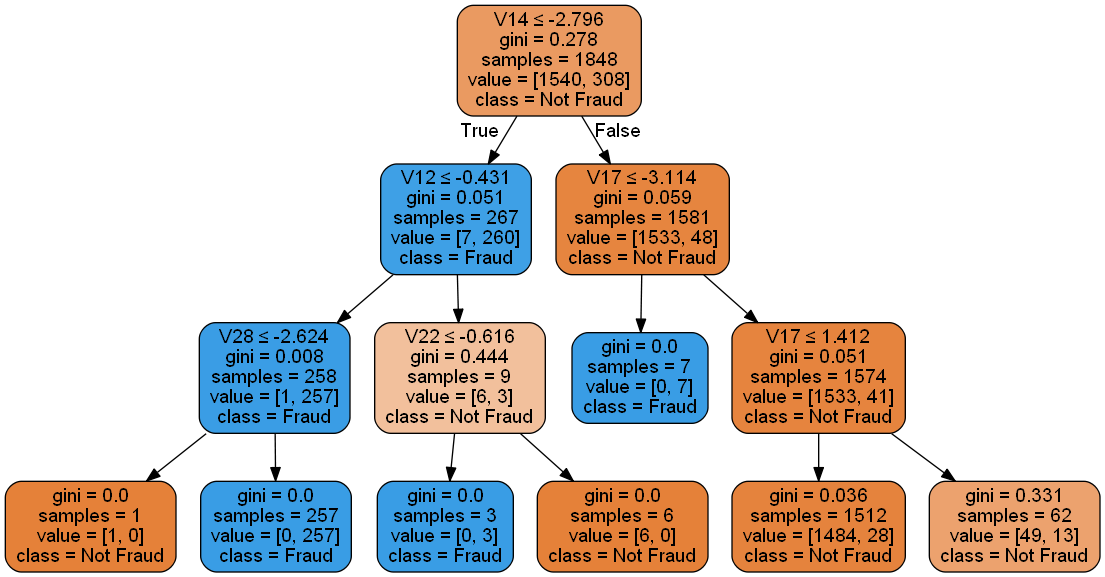

In [8]:
graph.write_pdf('decision-tree-gini.pdf')
graph.write_png('decision-tree-gini.png')
Image(graph.create_png())

In [9]:
y_pred_val = clf_dt.predict(X_val.copy())

## 3. Confusion Matrix

In [10]:
from sklearn.metrics import confusion_matrix

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[56609   256]
 [   14    83]]


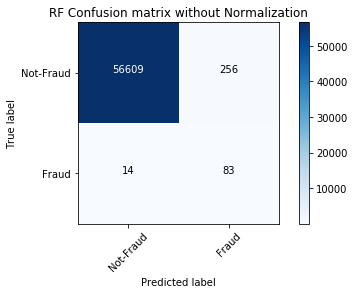

Normalized confusion matrix
[[1.   0.  ]
 [0.14 0.86]]


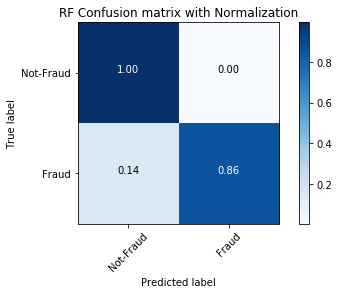

In [11]:
cm = confusion_matrix(y_val['Class'].values, y_pred_val)

class_names = ['Not-Fraud','Fraud']
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names , 
                      title = 'RF Confusion matrix without Normalization')
plt.show()

plot_confusion_matrix(cm, 
                      classes = class_names , 
                      normalize = True,
                      title = 'RF Confusion matrix with Normalization')
plt.show()


In [12]:
total1=sum(sum(cm))


sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

Sensitivity :  0.9954981095577244
Specificity :  0.8556701030927835


## 4. Metrics Scores

In [13]:

acc= accuracy_score( y_val['Class'].values, y_pred_val)
recall = recall_score( y_val['Class'].values, y_pred_val, average='binary')
precision = precision_score( y_val['Class'].values, y_pred_val)
f1 = f1_score( y_val['Class'].values, y_pred_val, average='binary')
average = average_precision_score( y_val['Class'].values, y_pred_val)
kappa = cohen_kappa_score( y_val['Class'].values,y_pred_val,)

print('Accuracy', acc)
print('Recall score', recall)
print('Precision', precision)
print('f1_score', f1)
print ('Average precision-recall score: {0:0.2f}'.format(average))
print('Kappa Score', kappa)

Accuracy 0.9952599978933324
Recall score 0.8556701030927835
Precision 0.2448377581120944
f1_score 0.3807339449541284
Average precision-recall score: 0.21
Kappa Score 0.37908973015623215


# 5. Save the model

In [21]:
joblib.dump(clf_dt, 'DecisionTree-gini.pkl') 

['DecisionTree-gini.pkl']